# Sanofi Paul Ricard
This notebook is being used to generate a nice image of cars around the Paul Ricard ciruit.

In [1]:
# import libraries
import plotly.graph_objects as go
import pandas as pd
import fastf1 as ff1
import numpy as np

In [2]:
# dir = "data/"
dir = "C:/Users/mark_/Documents/McLaren2021/Sanofi/Race Dashboard Data/"
df = pd.read_csv(dir + 'leaderboard.csv')
df.head()


,Unnamed: 0,Line,2021-04-15 00:00:00,2021-05-13 00:00:00,2021-06-10 00:00:00,2021-07-08 00:00:00,race_time,prev_race_time,Plant,position,gap_to_leader,prev_position,Gain/Loss,interval,OEE Start point,⇗ OEE% progress,OEE% Target (2022)
0,0,GAMMA1,89.153727,79.525767,79.076756,64.979194,312.735444,247.756250,SCOPPITO,1,0.000000,1,0,NaN,0.418683,0.107661,0.650
1,1,IMA C80/2,88.910416,79.456522,82.482693,64.674113,315.523744,250.849631,SCOPPITO,2,2.788299,2,0,2.788299,0.451031,0.082125,0.650
2,2,C9 Packaging Line,88.912817,89.747841,90.361488,72.580804,341.602950,269.022146,Maisons-Alfort,3,28.867505,13,10,26.079206,0.419899,0.089002,0.530
3,3,AL6,89.138010,90.323044,87.005598,75.556131,342.022783,266.466652,Frankfurt,4,29.287338,8,4,0.419833,0.332657,-0.005371,0.485
4,4,AL5 Packaging 1,89.248851,89.725754,90.495004,75.209946,344.679555,269.469609,Frankfurt,5,31.944111,14,9,2.656772,0.479693,0.035382,0.500


In [3]:
cars = df[['Line', 'gap_to_leader']]

In [4]:
ff1.Cache.enable_cache('f1_cache')
laps = ff1.get_session(2020, 'Silverstone', 'Q').load_laps(with_telemetry=True)
tel = laps.pick_driver('NOR').pick_fastest().telemetry

core           INFO 	Loading laps for British Grand Prix - Qualifying [v2.1.6]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['31', '99', '3', '44', '27', '55', '63', '16', '6', '77', '23', '18', '5', '26', '20', '10', '33', '4', '7', '8']


In [5]:
import matplotlib.pyplot as plt

In [6]:
plt.style.use('dark_background')

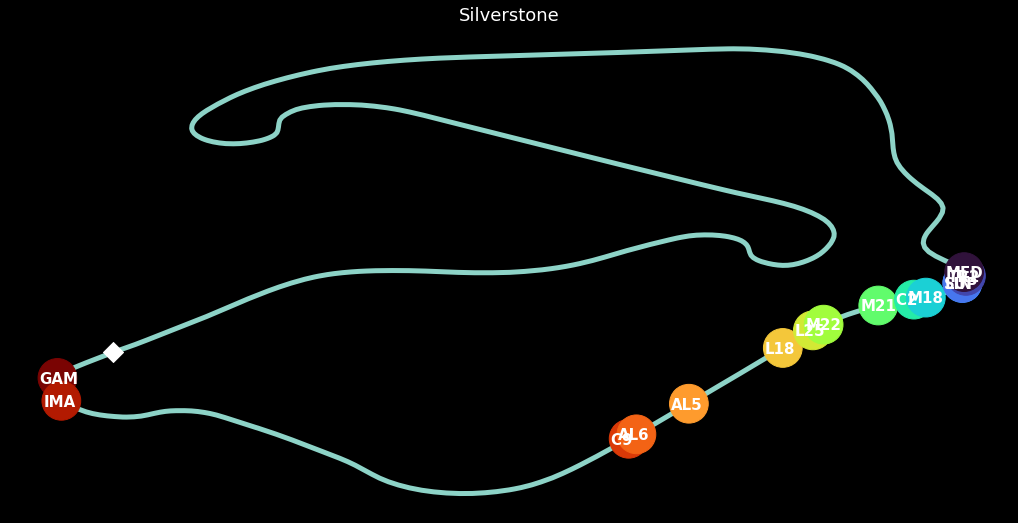

In [9]:
plt.figure(figsize=(18,9))
plt.plot(tel.X, tel.Y, zorder=1, lw=5)


result_x=[]
result_y=[]

t = np.linspace(1,15,len(cars))

#im = plt.imread('images/ch_flag.jpg')
#plt.imshow(im,x=tel.X.iloc[0], y=tel.Y.iloc[0],zorder=1, origin='lower')  

multiplier=-5
offset_for_cars=10

# show where the start / finish line is
start_x=[]
start_y=[]
start_x.__iadd__([tel.X.iloc[int(1)]])
start_y.__iadd__([tel.Y.iloc[int(1)]])

for i, row in cars.iterrows():
    result_x.__iadd__([tel.X.iloc[int(multiplier*(row[1]+1))-offset_for_cars]])
    result_y.__iadd__([tel.Y.iloc[int(multiplier*(row[1]+1))-offset_for_cars]])


plt.scatter(result_x, result_y, s=1500, c=t, cmap='turbo_r', zorder=2)
font = {'weight' : 'bold',
        'size'   : 15}

plt.rc('font', **font)

for i, row in cars.iterrows():
    plt.text(tel.X.iloc[int(multiplier*(row[1]+1))-offset_for_cars]-200, tel.Y.iloc[int(multiplier*(row[1]+1))-offset_for_cars]-200, row[0][:3], c='white')

plt.scatter(start_x, start_y, marker = 'D', c='white', zorder=2, s=200)

# plt.scatter(160, -2330, marker = 'D', c='white', zorder=2)
#plt.scatter(460, -2130, marker = 'd', c='white', zorder=2)
#plt.scatter(300, -2130, marker = 'd', c='black', zorder=2)  
#plt.scatter(460, -1930, marker = 'd', c='black', zorder=2)  
#plt.scatter(600, -2130, marker = 'd', c='black', zorder=2) 
    
# for i, row in cars.iterrows():
#     plt.scatter(tel.X.iloc[int(-15*(row[1]+1))], tel.Y.iloc[int(-15*(row[1]+1))], s = 1000, c=t, cmap='Oranges', zorder=2)
#     plt.text(tel.X.iloc[int(-15*(row[1]+1))]-200, tel.Y.iloc[int(-15*(row[1]+1))], row[0][:3], c='white')

plt.title('Silverstone')
plt.axis('off')
plt.show()

In [25]:
tel.Y.iloc[-1]

-1932